<a href="https://colab.research.google.com/github/Manisha-Fulare/GRIP22-Task1/blob/main/TASK1_Predication_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
GRIP : The Spark Foundation - December 2022

TASK1:- Predication_using_Supervised_ML

Predict the percentage of an student based on the no. of study hours
Author :- Manisha Dattatray Fulare

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
Task1_Data = pd.read_csv(url)

In [ ]:
# Data Imported successfully
# Displaying the students database from the given link

print(Task1_Data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [ ]:
# Describing the data

Task1_Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# Check the data if any null values are present

Task1_Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

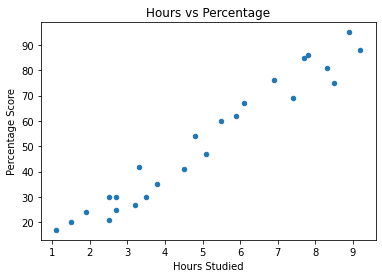

In [ ]:
# Visualization of data
# Plotting the distribution of data

Task1_Data.plot(x='Hours',y='Scores',kind='scatter')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
# From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [ ]:
# Preparing the data
# Dividing the data into "attributes" (inputs) and "labels" (outputs).

new_x=Task1_Data.iloc[:,:-1].values
new_y=Task1_Data.iloc[:,1].values
print(new_x)
print(new_y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
# Splitting the dataset into testing and training
'''Now we have our attributes and labels, now split this data into training and test sets. 
I do this by using Scikit-Learn's built-in train_test_split() method:'''

from sklearn.model_selection import train_test_split
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y,
                                                                    test_size = 0.2, random_state=0)
new_x_test #divides the data for testing by 20%
new_y_test #the splitting is on random basis


array([20, 27, 69, 30, 62])

In [ ]:
# Training the Algorithm
# We have split data into training and testing sets, and now is finally the time to train our algorithm. 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(new_x_train,new_y_train)
print("Training is completed")

Training is completed


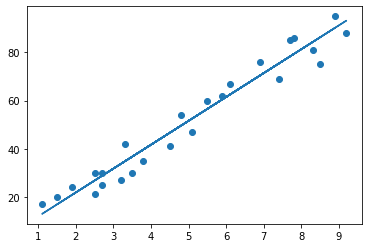

In [ ]:
# Plotting the regression line   (line=mx+c)

line = regressor.coef_*new_x + regressor.intercept_

# Plotting for the test data

plt.scatter(new_x,new_y)
plt.plot(new_x,line)

In [ ]:
# Prediction of Datavalues

print(new_x_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Predicting the scores

y_predict=regressor.predict(new_x_test) 
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
# Now compare actual data values with the predicted ones

df=pd.DataFrame({'Actual':new_y_test,'Predicted values':y_predict})
print(df)

   Actual  Predicted values
0      20         16.884145
1      27         33.732261
2      69         75.357018
3      30         26.794801
4      62         60.491033


In [ ]:
# Q. What will be the predicted score if a student studies for 9.25 hrs/day?

hours=9.25
h=np.array(hours)  
h=h.reshape(-1,1)  #reshaped because predict excepts 2D array
predict=regressor.predict(h)
print("Number of hours studied :- ",+hours)
print("Predicted score of student is :-",+predict)

Number of hours studied :-  9.25
Predicted score of student is :- [93.69173249]


In [ ]:
# Evaluating the model
# This step is important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. 

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(new_y_test,y_predict))

Mean Absolute Error: 4.183859899002982
